# Case 5o Andar


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Bootcamp_Data_Science/DBs/quinto_andar.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
quinto_andar_raw = pd.read_csv(path)
pd.set_option('display.max_columns', None)

## Scraping for city regions

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
def get_neighborhoods(links, zone):
  dict_neighborhood = {}
  for i in links:
    url_completa = i['href']
    response = requests.get(url_completa).content
    soup = BeautifulSoup(response, 'html.parser')
    selected_soup = soup.find_all("ul")
    for item in (selected_soup[2].text.strip().split("\n")):
      dict_neighborhood[item] = zone
  return dict_neighborhood

In [6]:
def get_pages(webpage, page_number, zone, total_pages, dict_of_neighborhoods):
  next_page = webpage + zone + "/page/" + str(page_number)
  response= requests.get(str(next_page)).content
  soup = BeautifulSoup(response, "html.parser")
  links = soup.find_all("a", class_= "readmore")
  neighborhoods = get_neighborhoods(links, zone)
  zone_neighborhoods = dict_of_neighborhoods
  zone_neighborhoods.update(neighborhoods)

  #Generating the next page url
  if page_number < total_pages:
    page_number = page_number + 1
    get_pages(webpage, page_number, zone, total_pages, zone_neighborhoods)

  return zone_neighborhoods

In [7]:
zones_pagesinfo = [("zona-leste", 4), ("zona-oeste", 2), ("zona-sul", 3), ("zona-central", 1), ("zona-norte", 2)]

In [8]:
def get_all_neighborhoods(zones_pagesinfo):
  dict_of_neighborhoods = {}
  url = "https://www.saopaulobairros.com.br/"
  for zone, page in zones_pagesinfo:
    zone_neighborhoods = get_pages(url, 1, zone, page, {})
    dict_of_neighborhoods.update(zone_neighborhoods)
  return dict_of_neighborhoods


In [9]:
total_of_neighborhoods = get_all_neighborhoods(zones_pagesinfo)

In [10]:
total_of_neighborhoods

{'Água Rasa': 'zona-leste',
 'Alto da Mooca': 'zona-leste',
 'Chácara Mafalda': 'zona-leste',
 'Chácara Paraíso': 'zona-leste',
 'Jardim Haddad': 'zona-leste',
 'Jardim Itália': 'zona-leste',
 'Jardim Silveira': 'zona-leste',
 'Parque Sevilha': 'zona-leste',
 'Vila Bertioga': 'zona-leste',
 'Vila Celeste': 'zona-leste',
 'Vila Claudia': 'zona-leste',
 'Vila Clotilde': 'zona-leste',
 'Vila Diva': 'zona-norte',
 'Vila Graciosa': 'zona-leste',
 'Vila Haddad': 'zona-leste',
 'Vila Leme': 'zona-leste',
 'Vila Libanesa': 'zona-leste',
 'Vila Lúcia Elvira': 'zona-leste',
 'Vila Oratório': 'zona-leste',
 'Vila Paulina': 'zona-leste',
 'Vila Regente Feijó': 'zona-leste',
 'Vila Rio Branco': 'zona-leste',
 'Vila Santa Clara': 'zona-leste',
 'Aricanduva': 'zona-leste',
 'Jardim Antonieta': 'zona-leste',
 'Jardim Aricanduva': 'zona-leste',
 'Jardim Barreira Grande': 'zona-leste',
 'Jardim Caguaçú': 'zona-leste',
 'Jardim Catarina': 'zona-leste',
 'Jardim Cotching': 'zona-leste',
 'Jardim das Rosas

## Data wrangling and tidying

In [11]:
quinto_andar_raw.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.


In [12]:
#drop url column
quinto_andar_raw = quinto_andar_raw.drop(columns="url")

In [13]:
quinto_andar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bairro           2777 non-null   object
 1   aluguel          2777 non-null   object
 2   condominio       2777 non-null   object
 3   iptu             2777 non-null   object
 4   seguro_incendio  2777 non-null   object
 5   taxa_serviço     2777 non-null   object
 6   total            2777 non-null   object
 7   metragem         2777 non-null   object
 8   quarto           2777 non-null   object
 9   banheiro         2777 non-null   object
 10  vaga_carro       2777 non-null   object
 11  andar            2777 non-null   object
 12  aceita_pet       2777 non-null   object
 13  mobilia          2777 non-null   object
 14  metro_prox       2777 non-null   object
dtypes: object(15)
memory usage: 325.6+ KB


### Checking for unique values

In [14]:
quinto_andar_raw["bairro"].unique()

array(['Liberdade', 'Santa Cecília', 'Aclimação', 'Vila Guilherme',
       'Pari', 'Perdizes', 'Barra Funda', 'Ipiranga', 'Mooca',
       'Casa Verde', 'Jardim Paulista', 'Paraíso', 'Consolação', 'Sumaré',
       'Centro', 'Belém', 'Cambuci', 'Brás', 'Bela Vista', 'Vila Mariana',
       'Vila Maria ', 'Pinheiros', 'Bom Retiro', 'Vila Pompéia',
       'Higienópolis', 'Canindé', 'Vila Olímpia', 'Vila Nova Conceição',
       'Itaim Bibi', 'Santana', 'Vila Prudente', 'Água Branca',
       'Vila Clementino', 'Jardim América', 'Moema', 'Pacaembu'],
      dtype=object)

In [15]:
#filters rows with values that are diferent from the expected value
def get_unexpected_values(dataframe, column, match):
  return dataframe[~dataframe[column].str.contains(match, regex=True, na=False)][column].value_counts()

In [16]:
get_unexpected_values(quinto_andar_raw, "aluguel", "^R\$")

Series([], Name: aluguel, dtype: int64)

In [17]:
get_unexpected_values(quinto_andar_raw, "condominio", "^R\$")

Incluso     65
Sem info     7
Name: condominio, dtype: int64

In [18]:
get_unexpected_values(quinto_andar_raw, "iptu", "^R\$")

Incluso    8
Name: iptu, dtype: int64

In [19]:
get_unexpected_values(quinto_andar_raw, "seguro_incendio", "^R\$")

Series([], Name: seguro_incendio, dtype: int64)

In [20]:
get_unexpected_values(quinto_andar_raw, "metragem", "m²$")

Vila Olímpia, São Paulo    1
Name: metragem, dtype: int64

In [21]:
get_unexpected_values(quinto_andar_raw, "quarto", "quartos?$")

Vila Olímpia, São Paulo    1
Name: quarto, dtype: int64

In [22]:
get_unexpected_values(quinto_andar_raw, "banheiro", "banheiros?$")

Itaim Bibi, São Paulo    1
Name: banheiro, dtype: int64

In [23]:
get_unexpected_values(quinto_andar_raw, "vaga_carro", "vagas?$")

Jardim Paulista, São Paulo    1
Name: vaga_carro, dtype: int64

In [24]:
get_unexpected_values(quinto_andar_raw, "andar", "andar$")

-                                 258
Vila Nova Conceição, São Paulo      1
Name: andar, dtype: int64

In [25]:
quinto_andar_raw["aceita_pet"].unique()

array(['Aceita pet', 'Não aceita', '90 m²'], dtype=object)

In [26]:
quinto_andar_raw["mobilia"].unique()

array(['Sem mobília', 'Mobiliado', '2 quartos'], dtype=object)

In [27]:
quinto_andar_raw["metro_prox"].unique()

array(['Metrô próx.', 'Não próx.', '1 banheiro'], dtype=object)

### Row with messy data

In [28]:
quinto_andar_raw[quinto_andar_raw["metro_prox"] == "1 banheiro"]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1562,Vila Olímpia,R$ 2.750,R$ 700,R$ 303,R$ 35,R$ 55,R$ 3.843,"Vila Olímpia, São Paulo","Vila Olímpia, São Paulo","Itaim Bibi, São Paulo","Jardim Paulista, São Paulo","Vila Nova Conceição, São Paulo",90 m²,2 quartos,1 banheiro


In [29]:
quinto_andar_raw["vaga_carro"].mode()

0    Sem vaga
dtype: object

In [30]:
quinto_andar_raw["aceita_pet"].mode()

0    Aceita pet
dtype: object

In [31]:
quinto_andar_raw["mobilia"].mode()

0    Sem mobília
dtype: object

In [32]:
quinto_andar_raw["metro_prox"].mode()

0    Metrô próx.
dtype: object

In [33]:
# Fix data in wrong columns and assign mode for missing columns
quinto_andar_raw.loc[1562, [
                        "metragem", 
                        "quarto", 
                        "banheiro", 
                        "vaga_carro", 
                        "aceita_pet", 
                        "mobilia", 
                        "metro_prox"]] = [
                                          "90 m²", 
                                          "2 quartos", 
                                          "1 banheiro", 
                                          "Sem vaga", 
                                          "Aceita pet", 
                                          "Sem mobília", 
                                          "Metrô próx."]

In [34]:
quinto_andar_raw.loc[1562, :]

bairro                               Vila Olímpia
aluguel                                  R$ 2.750
condominio                                 R$ 700
iptu                                       R$ 303
seguro_incendio                             R$ 35
taxa_serviço                                R$ 55
total                                    R$ 3.843
metragem                                    90 m²
quarto                                  2 quartos
banheiro                               1 banheiro
vaga_carro                               Sem vaga
andar              Vila Nova Conceição, São Paulo
aceita_pet                             Aceita pet
mobilia                               Sem mobília
metro_prox                            Metrô próx.
Name: 1562, dtype: object

### Remove rows with "incluso" value in "condominio" and "iptu" columns

In [35]:
quinto_andar = quinto_andar_raw.copy()
quinto_andar.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.
1,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.
2,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.
3,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.
4,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.


In [36]:
quinto_andar = quinto_andar.loc[(quinto_andar["condominio"] != "Incluso") & (quinto_andar["iptu"] != "Incluso")]

In [37]:
quinto_andar.shape

(2705, 15)

In [38]:
quinto_andar[quinto_andar["condominio"] == "incluso"]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox


In [39]:
quinto_andar[quinto_andar["iptu"] == "incluso"]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox


In [40]:
quinto_andar.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.
1,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.
2,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.
3,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.
4,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.


### Remove non-digit data and transform to float

In [41]:
quinto_andar["vaga_carro"] = quinto_andar["vaga_carro"].replace("Sem vaga", "0")

In [42]:
# parse number and transform to float
column_list = ["aluguel", "condominio", "iptu", "seguro_incendio", "taxa_serviço", "total", "metragem", "quarto", "banheiro", "vaga_carro", "andar"]

def parse_number_field(field):
  try:
    return float(re.sub("\D", '', field))
  except (TypeError, ValueError, AttributeError):
    return np.nan
  
def parse_number_fields():
  for column in column_list:
    quinto_andar[column] = [parse_number_field(x) for x in quinto_andar[column]]

parse_number_fields()

In [43]:
quinto_andar.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,Aceita pet,Sem mobília,Metrô próx.
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,Aceita pet,Mobiliado,Metrô próx.
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,Aceita pet,Sem mobília,Metrô próx.
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,Aceita pet,Mobiliado,Metrô próx.
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,Aceita pet,Sem mobília,Não próx.


In [44]:
quinto_andar.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar
count,2705.000000,2698.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2486.000000
mean,2279.470610,611.922535,287.445471,29.838447,45.387431,3252.299076,63.257301,1.592237,1.399630,0.628835,6.602977
std,1327.011468,424.801045,9531.989287,17.526506,26.569950,9706.301226,37.468581,0.745112,0.686137,0.668764,5.109392
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,1.000000
25%,1400.000000,347.000000,0.000000,19.000000,28.000000,1886.000000,40.000000,1.000000,1.000000,0.000000,2.000000
50%,1955.000000,536.000000,55.000000,26.000000,39.000000,2632.000000,52.000000,1.000000,1.000000,1.000000,6.000000
75%,2720.000000,814.250000,141.000000,36.000000,54.000000,3768.000000,75.000000,2.000000,2.000000,1.000000,9.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,72.000000


IPTU

In [45]:
quinto_andar[quinto_andar["iptu"] > 2000]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1709,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,NaN,Aceita pet,Sem mobília,Metrô próx.


In [46]:
quinto_andar.loc[1709, "iptu"] = 495.80

In [47]:
quinto_andar.loc[1709, "iptu"]

495.8

In [48]:
quinto_andar[quinto_andar["iptu"] == 0]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,Aceita pet,Mobiliado,Metrô próx.
6,Perdizes,1600.0,405.0,0.0,21.0,32.0,2058.0,50.0,2.0,1.0,0.0,9.0,Aceita pet,Sem mobília,Não próx.
7,Barra Funda,1350.0,440.0,0.0,18.0,27.0,1835.0,50.0,1.0,1.0,0.0,12.0,Aceita pet,Sem mobília,Metrô próx.
10,Mooca,1648.0,890.0,0.0,21.0,32.0,2591.0,110.0,3.0,2.0,0.0,3.0,Aceita pet,Sem mobília,Não próx.
14,Santa Cecília,1550.0,320.0,0.0,20.0,31.0,1921.0,66.0,2.0,1.0,0.0,3.0,Aceita pet,Sem mobília,Metrô próx.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,Santa Cecília,552.0,520.0,0.0,7.0,11.0,1090.0,30.0,0.0,1.0,0.0,NaN,Aceita pet,Sem mobília,Metrô próx.
2767,Consolação,2400.0,380.0,0.0,31.0,48.0,2859.0,55.0,1.0,1.0,0.0,9.0,Aceita pet,Mobiliado,Metrô próx.
2768,Consolação,1722.0,382.0,0.0,22.0,34.0,2160.0,50.0,1.0,1.0,0.0,11.0,Aceita pet,Sem mobília,Metrô próx.
2773,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,Aceita pet,Sem mobília,Metrô próx.


### Create region classes and assign neighborhoods to the correct region

In [49]:
quinto_andar.bairro.nunique()

36

In [50]:
quinto_andar["bairro"].unique()

array(['Liberdade', 'Santa Cecília', 'Aclimação', 'Vila Guilherme',
       'Pari', 'Perdizes', 'Barra Funda', 'Ipiranga', 'Mooca',
       'Jardim Paulista', 'Paraíso', 'Consolação', 'Sumaré', 'Centro',
       'Belém', 'Cambuci', 'Brás', 'Bela Vista', 'Vila Mariana',
       'Vila Maria ', 'Pinheiros', 'Bom Retiro', 'Vila Pompéia',
       'Higienópolis', 'Canindé', 'Vila Olímpia', 'Vila Nova Conceição',
       'Itaim Bibi', 'Casa Verde', 'Santana', 'Vila Prudente',
       'Água Branca', 'Jardim América', 'Vila Clementino', 'Moema',
       'Pacaembu'], dtype=object)

In [51]:
quinto_andar["bairro"] = quinto_andar["bairro"].apply(lambda x: x.strip())

In [52]:
quinto_andar["regiao"] = quinto_andar["bairro"].map(total_of_neighborhoods)

In [53]:
quinto_andar[quinto_andar["regiao"].isna()]["bairro"].value_counts()

Barra Funda    68
Vila Maria      7
Name: bairro, dtype: int64

In [54]:
quinto_andar["regiao"][quinto_andar["bairro"] == "Barra Funda"] = "zona-oeste"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
quinto_andar["regiao"][quinto_andar["bairro"] == "Vila Maria"] = "zona-norte"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
quinto_andar[quinto_andar["regiao"].isna()]["bairro"].value_counts()

Series([], Name: bairro, dtype: int64)

In [57]:
quinto_andar.shape

(2705, 16)

### Create dummies for categorical data

In [58]:
list_dummies = ["aceita_pet", "mobilia", "metro_prox", "regiao"]
for column in list_dummies:
    dummie = pd.get_dummies(quinto_andar[column])
    quinto_andar = pd.concat([quinto_andar, dummie], axis=1)

In [59]:
quinto_andar.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao,Aceita pet,Não aceita,Mobiliado,Sem mobília,Metrô próx.,Não próx.,zona-central,zona-leste,zona-norte,zona-oeste,zona-sul
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,Aceita pet,Sem mobília,Metrô próx.,zona-central,1,0,0,1,1,0,1,0,0,0,0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,Aceita pet,Mobiliado,Metrô próx.,zona-central,1,0,1,0,1,0,1,0,0,0,0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,Aceita pet,Sem mobília,Metrô próx.,zona-central,1,0,0,1,1,0,1,0,0,0,0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,Aceita pet,Mobiliado,Metrô próx.,zona-central,1,0,1,0,1,0,1,0,0,0,0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,Aceita pet,Sem mobília,Não próx.,zona-norte,1,0,0,1,0,1,0,0,1,0,0


In [60]:
quinto_andar = quinto_andar.drop(columns=["aceita_pet", "mobilia", "metro_prox"])

In [61]:
quinto_andar.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,regiao,Aceita pet,Não aceita,Mobiliado,Sem mobília,Metrô próx.,Não próx.,zona-central,zona-leste,zona-norte,zona-oeste,zona-sul
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,zona-central,1,0,0,1,1,0,1,0,0,0,0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,zona-central,1,0,1,0,1,0,1,0,0,0,0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,zona-central,1,0,0,1,1,0,1,0,0,0,0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,zona-central,1,0,1,0,1,0,1,0,0,0,0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,zona-norte,1,0,0,1,0,1,0,0,1,0,0


In [62]:
quinto_andar.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,Aceita pet,Não aceita,Mobiliado,Sem mobília,Metrô próx.,Não próx.,zona-central,zona-leste,zona-norte,zona-oeste,zona-sul
count,2705.000000,2698.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2486.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000
mean,2279.470610,611.922535,104.338558,29.838447,45.387431,3252.299076,63.257301,1.592237,1.399630,0.628835,6.602977,0.775601,0.224399,0.203697,0.796303,0.738632,0.261368,0.485397,0.092421,0.025139,0.278004,0.119039
std,1327.011468,424.801045,147.597540,17.526506,26.569950,9706.301226,37.468581,0.745112,0.686137,0.668764,5.109392,0.417263,0.417263,0.402821,0.402821,0.439461,0.439461,0.499879,0.289674,0.156575,0.448098,0.323894
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,347.000000,0.000000,19.000000,28.000000,1886.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1955.000000,536.000000,55.000000,26.000000,39.000000,2632.000000,52.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2720.000000,814.250000,141.000000,36.000000,54.000000,3768.000000,75.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,11250.000000,3300.000000,1917.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Treating null values

* Drop "andar" column
* Make a linear regression model for missing data in "condominio" column

In [63]:
quinto_andar.isna().sum()

bairro               0
aluguel              0
condominio           7
iptu                 0
seguro_incendio      0
taxa_serviço         0
total                0
metragem             0
quarto               0
banheiro             0
vaga_carro           0
andar              219
regiao               0
Aceita pet           0
Não aceita           0
Mobiliado            0
Sem mobília          0
Metrô próx.          0
Não próx.            0
zona-central         0
zona-leste           0
zona-norte           0
zona-oeste           0
zona-sul             0
dtype: int64

In [64]:
quinto_andar.drop(columns="andar", axis=1, inplace=True)

In [65]:
quinto_andar[quinto_andar["condominio"].isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,regiao,Aceita pet,Não aceita,Mobiliado,Sem mobília,Metrô próx.,Não próx.,zona-central,zona-leste,zona-norte,zona-oeste,zona-sul
988,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,zona-central,0,1,0,1,1,0,1,0,0,0,0
1392,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,zona-oeste,1,0,0,1,0,1,0,0,0,1,0
1528,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,zona-central,1,0,0,1,1,0,1,0,0,0,0
1803,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,zona-sul,1,0,0,1,0,1,0,0,0,0,1
2289,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,zona-sul,0,1,0,1,1,0,0,0,0,0,1
2389,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,zona-sul,0,1,0,1,1,0,0,0,0,0,1
2753,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,zona-sul,0,1,0,1,1,0,0,0,0,0,1


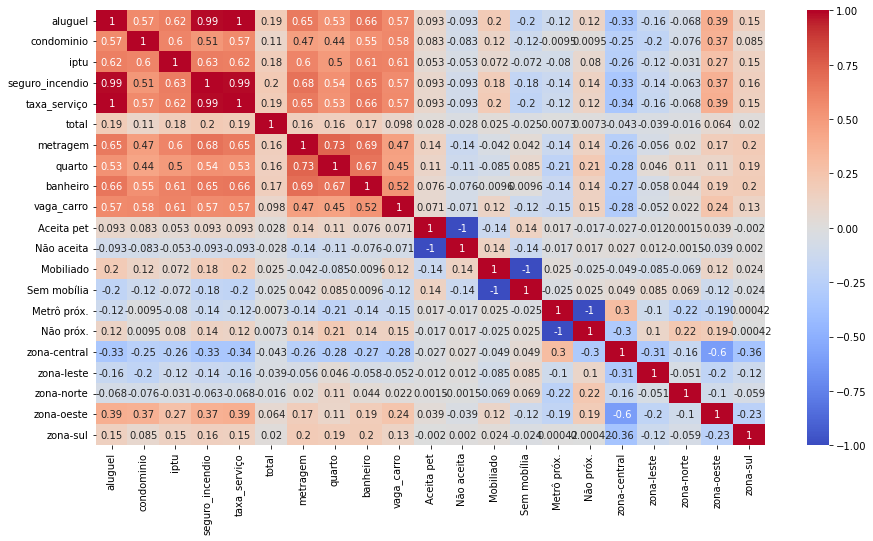

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(quinto_andar.corr(), annot=True, cmap='coolwarm')

In [67]:
quinto_andar["condominio"].describe()

count    2698.000000
mean      611.922535
std       424.801045
min         0.000000
25%       347.000000
50%       536.000000
75%       814.250000
max      3300.000000
Name: condominio, dtype: float64

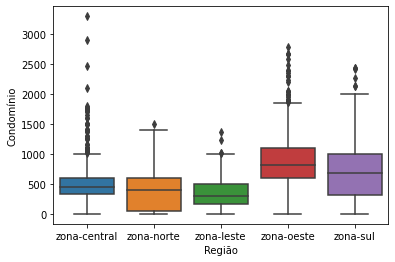

In [68]:
sns.boxplot(x="regiao", y="condominio", data=quinto_andar)
plt.xlabel("Região")
plt.ylabel("Condomínio")
plt.show()

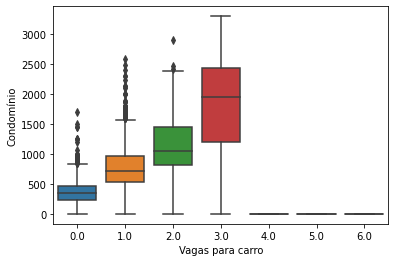

In [69]:
sns.boxplot(x="vaga_carro", y="condominio", data=quinto_andar)
plt.xlabel("Vagas para carro")
plt.ylabel("Condomínio")
plt.show()

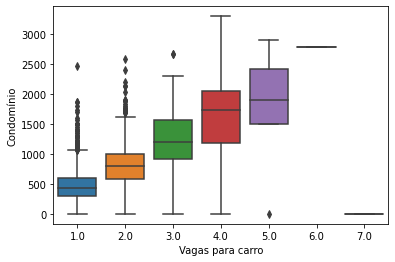

In [70]:
sns.boxplot(x="banheiro", y="condominio", data=quinto_andar)
plt.xlabel("Vagas para carro")
plt.ylabel("Condomínio")
plt.show()

#### Linear regression model

In [71]:
from sklearn.linear_model import LinearRegression
from scipy import stats

In [72]:
condominio_train = quinto_andar[quinto_andar["condominio"].notnull()]


In [73]:
condominio_test = quinto_andar[quinto_andar["condominio"].isnull()]

In [74]:
x_train = condominio_train[["vaga_carro", "banheiro"]]
y_train = condominio_train["condominio"]

In [75]:
x_test = condominio_test[["vaga_carro", "banheiro"]]
y_test = condominio_test["condominio"]

In [76]:
pearson_coef, p_value = stats.pearsonr(condominio_train["vaga_carro"], condominio_train["condominio"])
print('Coeficiente de Pearson: ', pearson_coef)
print('P-value: ', p_value)

Coeficiente de Pearson:  0.5831079220619635
P-value:  1.4207998903990687e-245


In [77]:
pearson_coef, p_value = stats.pearsonr(condominio_train["banheiro"], condominio_train["condominio"])
print('Coeficiente de Pearson: ', pearson_coef)
print('P-value: ', p_value)

Coeficiente de Pearson:  0.5466427296545765
P-value:  4.247110745802426e-210


In [78]:
lm = LinearRegression()

In [79]:
lm.fit(x_train, y_train)

LinearRegression()

In [80]:
YHat = lm.predict(x_test)

In [81]:
YHat

array([ 366.38654359, 1037.27396378,  625.96185499,  831.61790938,
        366.38654359,  366.38654359,  366.38654359])

In [82]:
quinto_andar["condominio"][quinto_andar["condominio"].isnull()] = YHat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
quinto_andar[quinto_andar["condominio"].isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,regiao,Aceita pet,Não aceita,Mobiliado,Sem mobília,Metrô próx.,Não próx.,zona-central,zona-leste,zona-norte,zona-oeste,zona-sul


In [84]:
quinto_andar.isnull().sum()

bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
regiao             0
Aceita pet         0
Não aceita         0
Mobiliado          0
Sem mobília        0
Metrô próx.        0
Não próx.          0
zona-central       0
zona-leste         0
zona-norte         0
zona-oeste         0
zona-sul           0
dtype: int64

## Models for predicting "aluguel"

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

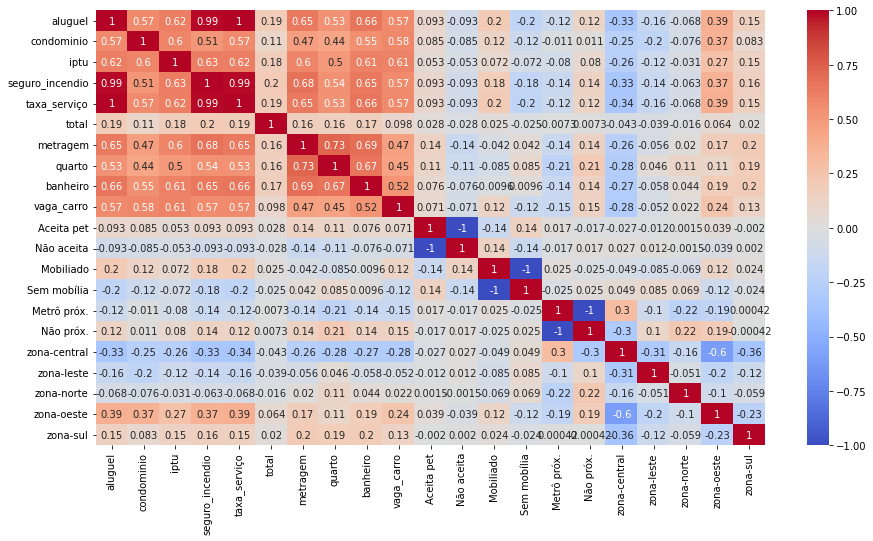

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(quinto_andar.corr(), annot=True, cmap='coolwarm')

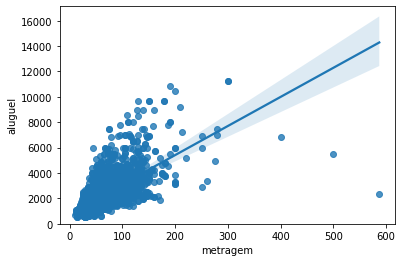

In [87]:
sns.regplot(x="metragem", y="aluguel", data=quinto_andar)
plt.ylim(0,)
plt.show()

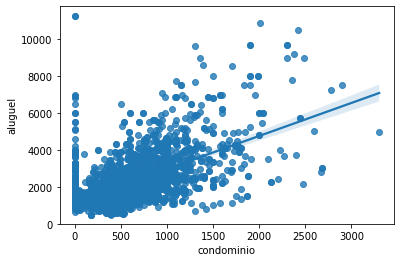

In [88]:
sns.regplot(x="condominio", y="aluguel", data=quinto_andar)
plt.ylim(0,)
plt.show()

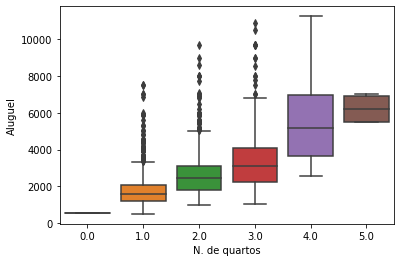

In [89]:
sns.boxplot(x="quarto", y="aluguel", data=quinto_andar)
plt.xlabel("N. de quartos")
plt.ylabel("Aluguel")
plt.show()

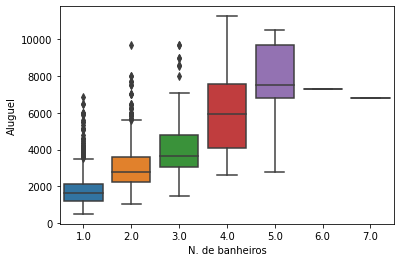

In [90]:
sns.boxplot(x="banheiro", y="aluguel", data=quinto_andar)
plt.xlabel("N. de banheiros")
plt.ylabel("Aluguel")
plt.show()

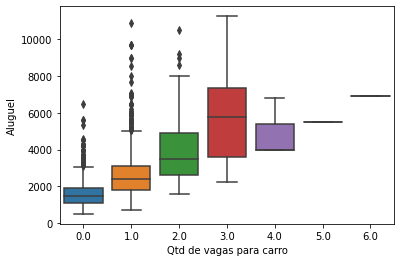

In [91]:
sns.boxplot(x="vaga_carro", y="aluguel", data=quinto_andar)
plt.xlabel("Qtd de vagas para carro")
plt.ylabel("Aluguel")
plt.show()

### Features: "metragem", "vaga_carro", "quarto". Polynomial degree 3

In [92]:
x = quinto_andar[["metragem", "vaga_carro", "quarto"]]
y = np.log(quinto_andar["aluguel"])

In [93]:
# variables not used: "banheiro" "condominio"

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [95]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [96]:
pr = PolynomialFeatures(degree=3)

In [97]:
x_train_pr = pr.fit_transform(x_train_scaled)
x_test_pr = pr.fit_transform(x_test_scaled)

In [98]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [99]:
p_yhat = poly.predict(x_test_pr)

In [100]:
r2 = r2_score(y_test, p_yhat)
mse = mean_squared_error(y_test, p_yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, p_yhat)

print('R2: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2:  0.6041294851800283
Mean Squared Error:  0.10573746927771692
Root Mean Squared Error:  0.3251729836221283
Mean Absolute Error:  0.25582914252786665


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


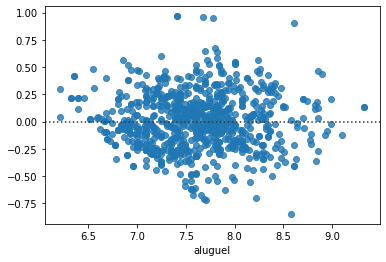

In [101]:
sns.residplot(y_test, p_yhat)
plt.show()

Lasso

In [102]:
#get best estimator for alpha
params = [{'alpha':[0.1, 0.5, 1.0, 10, 100, 1000, 10000]}]
lm = Lasso()

In [103]:
gridsearch = GridSearchCV(lm, params, cv=4)

In [104]:
gridsearch.fit(x_train_pr, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.1, 0.5, 1.0, 10, 100, 1000, 10000]}])

In [105]:
gridsearch.best_estimator_

Lasso(alpha=0.1)

In [106]:
lm = Lasso(0.1)

In [107]:
lm.fit(x_train_pr, y_train)

Lasso(alpha=0.1)

In [108]:
lm_yhat = lm.predict(x_test_pr)

In [109]:
r2 = r2_score(y_test, lm_yhat)
mse = mean_squared_error(y_test, lm_yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lm_yhat)

print('R2: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2:  0.4947448112184548
Mean Squared Error:  0.1349542413521029
Root Mean Squared Error:  0.3673611865073703
Mean Absolute Error:  0.2910040110123094


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


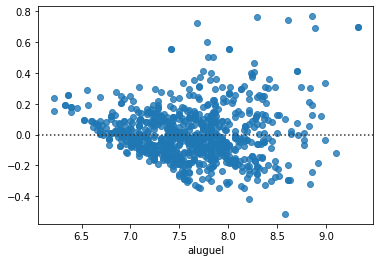

In [110]:
sns.residplot(y_test, lm_yhat)
plt.show()

Ridge

In [111]:
from sklearn.linear_model import Ridge

In [112]:
#get best estimator for alpha
params = [{'alpha':[0.1, 0.5, 1.0, 10, 100, 1000, 10000]}]
rm = Ridge()

In [113]:
gridsearch = GridSearchCV(rm, params, cv=4)

In [114]:
gridsearch.fit(x_train_pr, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 0.5, 1.0, 10, 100, 1000, 10000]}])

In [115]:
gridsearch.best_estimator_

Ridge(alpha=1000)

In [116]:
rm = Ridge(1000)

In [117]:
rm.fit(x_train_pr, y_train)

Ridge(alpha=1000)

In [118]:
rm_yhat = rm.predict(x_test_pr)

In [119]:
r2 = r2_score(y_test, rm_yhat)
mse = mean_squared_error(y_test, rm_yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rm_yhat)

print('R2: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2:  0.5387669494499385
Mean Squared Error:  0.12319587765859125
Root Mean Squared Error:  0.3509927031415201
Mean Absolute Error:  0.2777610925590129


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


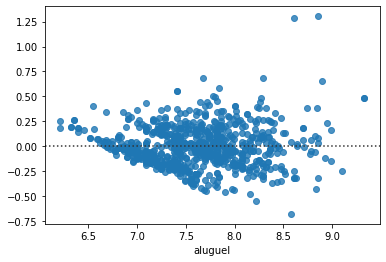

In [120]:
sns.residplot(y_test, rm_yhat)
plt.show()

### Features: "metragem", "condominio". Polynomial degree 3

In [121]:
x = quinto_andar[["metragem", "condominio"]]
y = quinto_andar["aluguel"]

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [123]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [124]:
pr = PolynomialFeatures(degree=3)

In [125]:
x_train_pr = pr.fit_transform(x_train_scaled)
x_test_pr = pr.fit_transform(x_test_scaled)

In [126]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [127]:
p_yhat = poly.predict(x_test_pr)

In [128]:
r2 = r2_score(y_test, p_yhat)
mse = mean_squared_error(y_test, p_yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, p_yhat)

print('R2: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2:  0.5101938755502566
Mean Squared Error:  895416.0682151356
Root Mean Squared Error:  946.2642697550909
Mean Absolute Error:  628.2425741175667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


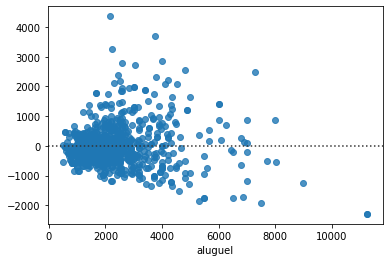

In [129]:
sns.residplot(y_test, p_yhat)
plt.show()

#### Lasso

In [130]:
#get best estimator for alpha
params = [{"alpha":[0.1, 0.5, 1.0, 10, 100, 1000, 10000]}]
lm = Lasso()

In [131]:
gridsearch = GridSearchCV(lm, params, cv=4)

In [132]:
gridsearch.fit(x_train_pr, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.1, 0.5, 1.0, 10, 100, 1000, 10000]}])

In [133]:
gridsearch.best_estimator_

Lasso(alpha=100)

In [134]:
lm = Lasso(0.1)

In [135]:
lm.fit(x_train_pr, y_train)

Lasso(alpha=0.1)

In [136]:
lm_yhat = lm.predict(x_test_pr)

In [137]:
r2 = r2_score(y_test, lm_yhat)
mse = mean_squared_error(y_test, lm_yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lm_yhat)

print('R2: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2:  0.5102634156567929
Mean Squared Error:  895288.941734535
Root Mean Squared Error:  946.1970945498274
Mean Absolute Error:  628.235034220134


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


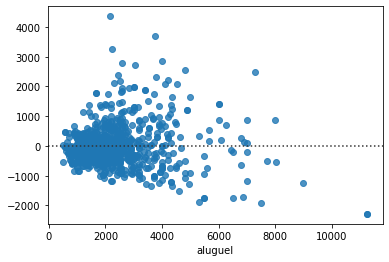

In [138]:
sns.residplot(y_test, lm_yhat)
plt.show()